<a href="https://colab.research.google.com/github/JSJeong-me/GPT-Agent/blob/main/Fuzzy/Fuzzy-BDI01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-fuzzy matplotlib numpy

Step-by-Step Example: Fuzzy Logic Temperature Control System

Explanation:
Antecedent (temperature): Input variable with three categories: cold, warm, hot.

Consequent (fan_speed): Output variable with three categories: low, medium, high.

Rules: Link the inputs and outputs logically.

Fuzzification & Defuzzification: Handled internally by scikit-fuzzy.

Explanation of this BDI-Fuzzy Logic Model:
Belief (0-10): The agent’s confidence in certain knowledge or information.

Desire (0-10): How strongly the agent wants to achieve a certain goal.

Intensity of Intention (0-10): How strongly the agent commits to action based on belief and desire.

Fuzzy Rules logic:
High belief combined with strong desire → high intensity of intention.

Moderate combinations result in medium intention.

Weak or low combinations reduce intensity to low.

You can adapt the fuzzy membership functions and rules to your specific scenario or more sophisticated BDI applications.

Belief: 7.5
Desire: 8.0
Computed Intention Intensity: 8.44


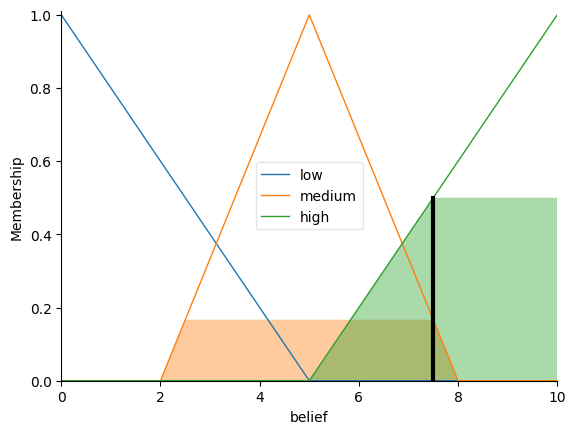

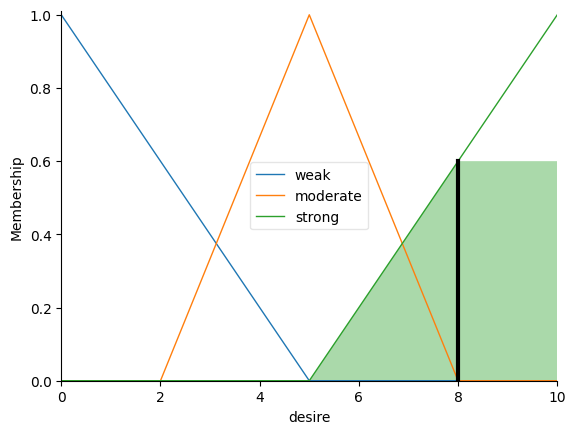

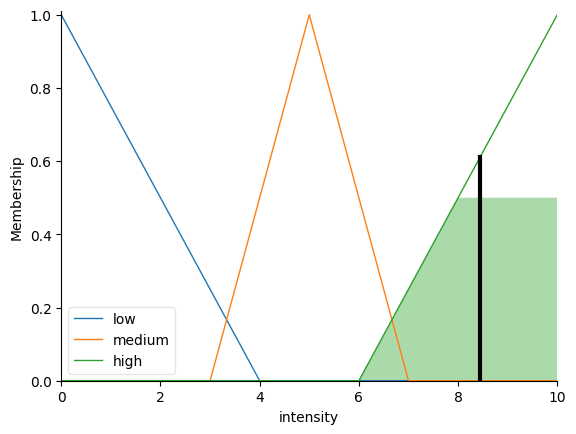

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# 1. Define fuzzy variables
belief = ctrl.Antecedent(np.arange(0, 11, 1), 'belief')        # Strength of belief (0-10)
desire = ctrl.Antecedent(np.arange(0, 11, 1), 'desire')        # Strength of desire (0-10)
intensity = ctrl.Consequent(np.arange(0, 11, 1), 'intensity')  # Intensity of intention (0-10)

# 2. Membership functions for belief
belief['low'] = fuzz.trimf(belief.universe, [0, 0, 5])
belief['medium'] = fuzz.trimf(belief.universe, [2, 5, 8])
belief['high'] = fuzz.trimf(belief.universe, [5, 10, 10])

# Membership functions for desire
desire['weak'] = fuzz.trimf(desire.universe, [0, 0, 5])
desire['moderate'] = fuzz.trimf(desire.universe, [2, 5, 8])
desire['strong'] = fuzz.trimf(desire.universe, [5, 10, 10])

# Membership functions for intensity of intention
intensity['low'] = fuzz.trimf(intensity.universe, [0, 0, 4])
intensity['medium'] = fuzz.trimf(intensity.universe, [3, 5, 7])
intensity['high'] = fuzz.trimf(intensity.universe, [6, 10, 10])

# 3. Define fuzzy rules (BDI reasoning)
rule1 = ctrl.Rule(belief['high'] & desire['strong'], intensity['high'])
rule2 = ctrl.Rule(belief['medium'] & desire['strong'], intensity['high'])
rule3 = ctrl.Rule(belief['high'] & desire['moderate'], intensity['medium'])
rule4 = ctrl.Rule(belief['medium'] & desire['moderate'], intensity['medium'])
rule5 = ctrl.Rule(belief['low'] | desire['weak'], intensity['low'])
rule6 = ctrl.Rule(belief['medium'] & desire['weak'], intensity['low'])

# 4. Create control system
bdi_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
bdi_simulation = ctrl.ControlSystemSimulation(bdi_ctrl)

# Function to compute intensity based on belief and desire
def compute_intensity(belief_value, desire_value):
    bdi_simulation.input['belief'] = belief_value
    bdi_simulation.input['desire'] = desire_value
    bdi_simulation.compute()
    return bdi_simulation.output['intensity']

# Example usage:
belief_input = 7.5
desire_input = 8.0
result_intensity = compute_intensity(belief_input, desire_input)

print(f'Belief: {belief_input}')
print(f'Desire: {desire_input}')
print(f'Computed Intention Intensity: {result_intensity:.2f}')

# Visualize results
belief.view(sim=bdi_simulation)
desire.view(sim=bdi_simulation)
intensity.view(sim=bdi_simulation)

plt.show()
